In [4]:
import os
import sys 

import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import pickle
import json 
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# collect the full path to this script 
parent_directory = os.path.dirname(os.getcwd())
output_directory = os.path.join(parent_directory, 'notebooks', 'output_csv')
sys.path.append(parent_directory)
from utils.functions import get_cumulative_probability_threshold_levels, get_2d_jointplot_with_text
from utils.general import setup_environment, create_folders_if_they_do_not_exist

# Set random seeds for reproducibility
random.seed(42)
np.random.seed(42)

In [5]:
# Input paths 
# flatness_fragmentation_ratios_path = "/home/abharadwaj1/thesis/data_archive/processed_data_output/3_surfer/training_data_analysis/flatness_fragmentation_ratios.pickle"

# flatness_fragmentation_ratios = pd.read_pickle(flatness_fragmentation_ratios_path)
# all_flatness_ratios = flatness_fragmentation_ratios["all_flatness_ratios"]
# all_fragmentation_ratios = flatness_fragmentation_ratios["all_fragmentation_ratios"]
# all_emdb_ids = [x for x in list(flatness_fragmentation_ratios.keys()) if x not in ["all_flatness_ratios", "all_fragmentation_ratios"]]

# # dump the data into a csv file for plotting
output_csv_path = os.path.join(output_directory, "flatness_fragmentation_ratios.csv")
# df = pd.DataFrame({
#     "emdb_id": all_emdb_ids,
#     "flatness_ratio": all_flatness_ratios,
#     "fragmentation_ratio": all_fragmentation_ratios
# })
# df.to_csv(output_csv_path, index=True)

df = pd.read_csv(output_csv_path)
all_flatness_ratios = df["flatness_ratio"].values.tolist()
all_fragmentation_ratios = df["fragmentation_ratio"].values.tolist()
# read all the emdb ids as string with minimum length of 4 (to preserve leading zeros) and convert to list
all_emdb_ids = df["emdb_id"].astype(str).values.tolist()
all_emdb_ids = [x.zfill(4) for x in all_emdb_ids]

Levels: [20.42466865986606, 9.529513171655594, 5.965505576935086, 3.684245239178399, 1.9740721456930033]
Contour labels: ['0.0', '50.0', '68.0', '80.0', '90.0']


<Figure size 708.661x708.661 with 0 Axes>

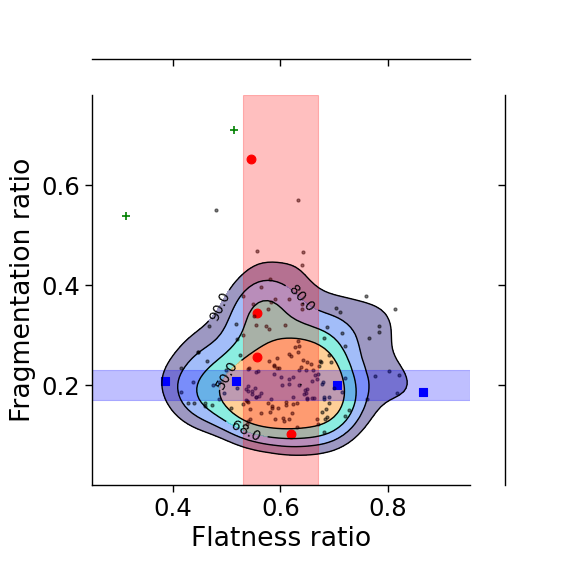

In [7]:
figsize_mm = (30, 30)
get_2d_jointplot_with_text(
    all_flatness_ratios, all_fragmentation_ratios, emdb_id_list = all_emdb_ids, \
    x_label="Flatness ratio", y_label="Fragmentation ratio", save_path=None, figsize_mm=figsize_mm, \
    probability_levels_required = [0, 0.5, 0.68, 0.8, 0.9], 
    fontsize=10, 
    xticks=[0.4, 0.6, 0.8], yticks=[0.2, 0.4, 0.6, 0.8], \
    mark_emdb_ids={
        "red" : ["0499", "0928", "13201", "25691"], 
        "blue" : ["4270", "9941", "12095", "30713"], 
        "green" : ["9696", "13880"]
        },
    );
